In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [7]:
df = pd.read_csv('user_reviews.csv')

In [8]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [15]:
df = df.dropna(subset=['Translated_Review', 'Sentiment'])

In [16]:
df.isna().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [17]:
df['Sentiment'].value_counts()

Sentiment
Positive    23998
Negative     8271
Neutral      5158
Name: count, dtype: int64

In [18]:
df['Sentiment'] = df['Sentiment'].map({'Positive':1, 'Neutral':0, 'Negative':-1})

Baseline model to check if sampling technique is required or not.

Accuracy: 0.8664173123163238

Classification Report:
               precision    recall  f1-score   support

          -1       0.79      0.87      0.83      1654
           0       0.66      0.93      0.77      1032
           1       0.97      0.85      0.91      4800

    accuracy                           0.87      7486
   macro avg       0.81      0.89      0.84      7486
weighted avg       0.89      0.87      0.87      7486



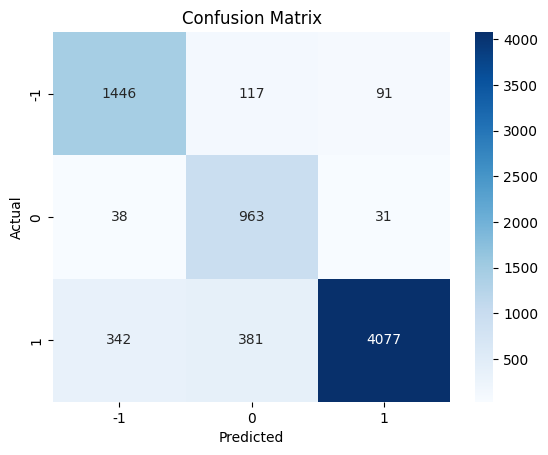

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Splitting into train & test
X_train, X_test, y_train, y_test = train_test_split(df['Translated_Review'], df['Sentiment'], test_size=0.2, stratify=df['Sentiment'], random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,1))  # Unigrams
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, class_weight="balanced")  # Handling imbalance
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[-1, 0, 1], yticklabels=[-1, 0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Sampling needed - Oversampling.

In [26]:
X = df['Translated_Review']
y = df['Sentiment']

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(sampling_strategy={-1: int(0.65 * y.value_counts()[1]), 
                                           0: int(0.65 * y.value_counts()[1])}) # type: ignore

x_over, y_over = os.fit_resample(X.values.reshape(-1, 1), y)




In [28]:
df_resampled = pd.DataFrame({'Translated_Review': x_over.flatten(), 'Sentiment': y_over})

In [29]:
df_resampled['Sentiment'].value_counts()

Sentiment
 1    23998
 0    15598
-1    15598
Name: count, dtype: int64

In [32]:
df_resampled['Translated_Review'] = df_resampled['Translated_Review'].apply(lambda x: x.lower())

In [34]:
df_resampled['Translated_Review'].head(5)

0    i like eat delicious food. that's i'm cooking ...
1      this help eating healthy exercise regular basis
2           works great especially going grocery store
3                                         best idea us
4                                             best way
Name: Translated_Review, dtype: object

In [36]:
df_resampled['Translated_Review'][0]

'i like eat delicious food. that\'s i\'m cooking food myself, case "10 best foods" helps lot, also "best before (shelf life)"'

In [37]:
import re
df_resampled['Translated_Review'] = df_resampled['Translated_Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [38]:
df_resampled['Translated_Review'][0]

'i like eat delicious food thats im cooking food myself case 10 best foods helps lot also best before shelf life'